In [19]:
import rosbag
import os
import tf
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
bag = rosbag.Bag('/media/kirill/2E493B983C144ACC/rosbags/ITLPCampus/indoor/00_2023-10-25-night/floor_5/2023-10-25-23-18-24_0.bag')

In [9]:
odom_msgs = []
for topic, msg, t in bag.read_messages():
    if topic == '/zed_node/odom':
        odom_msgs.append(msg)

In [14]:
points = []
for msg in odom_msgs:
    points.append([msg.pose.pose.position.x, msg.pose.pose.position.y, msg.pose.pose.position.z])
points = np.array(points)

In [82]:
points_expanded = np.concatenate([points, np.ones((points.shape[0], 1))], axis=1)
tf_matrix = np.eye(4)
min_z = []
max_z = []
rpys = []
for roll in np.linspace(-np.pi, np.pi, 20):
    for pitch in np.linspace(-np.pi, np.pi, 20):
        r = Rotation.from_rotvec([roll, pitch, 0]).as_matrix()
        t = [0, 0, 0]
        tf_matrix[:3, :3] = r
        tf_matrix[:3, 3] = t
        points_transformed = np.linalg.inv(tf_matrix) @ points_expanded.T
        points_transformed = points_transformed.T
        points_transformed = points_transformed[:, :3] / points_transformed[:, 3:]
        min_z.append(points_transformed[:, 2].min())
        max_z.append(points_transformed[:, 2].max())
        rpys.append((roll, pitch))

In [84]:
roll, pitch = rpys[(np.array(max_z) - np.array(min_z)).argmin()]
r = Rotation.from_rotvec([roll, pitch, 0]).as_matrix()
t = [0, 0, 0]
tf_matrix[:3, :3] = r
tf_matrix[:3, 3] = t
points_transformed = np.linalg.inv(tf_matrix) @ points_expanded.T
points_transformed = points_transformed.T
points_transformed = points_transformed[:, :3] / points_transformed[:, 3:]

In [86]:
roll, pitch

(2.14951076298249, -0.8267349088394194)

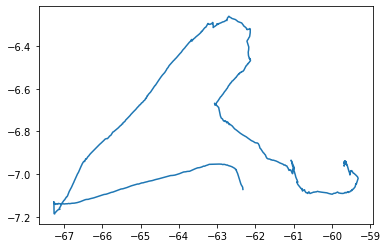

In [85]:
plt.plot(points_transformed[:, 0], points_transformed[:, 2])